# Notebook : Pr√©paration et nettoyage des donn√©es de transports (√éle-de-France)

---

## üìë Table des mati√®res


1. [Introduction](#introduction)
2. [Import des bibliotheques](#import-des-bibliotheques)
3. [Chargement des donnees brutes](#chargement-des-donnees-brutes)
4. [Exploration initiale des donnees](#exploration-initiale-des-donnees)
5. [Nettoyage des donnees](#nettoyage-des-donnees)
6. [Transformation](#transformation)
7. [Analyses statistiques descriptives](#analyses-statistiques-descriptives)
8. [Visualisations exploratoires](#visualisations-exploratoires)
9. [Export des donnees nettoyees](#export-des-donnees-nettoyees)
10. [Synthese du nettoyage](#synthese-du-nettoyage)



---

## Introduction

### Objectif de ce notebook

Ce notebook a pour objectif de pr√©parer et nettoyer les donn√©es de transport d‚Äô√éle-de-France,
afin de permettre une analyse de la proximit√© des transports en commun
par rapport aux biens immobiliers issus des donn√©es DVF.

### Sources de donn√©es utilis√©es

Fichier : emplacement-des-gares-idf.csv

Origine : √éle-de-France Mobilit√©s ‚Äî base officielle des points d‚Äôarr√™t du r√©seau r√©gional

Source : 
https://data.iledefrance-mobilites.fr/explore/dataset/emplacement-des-gares-idf/export/?utm_source=chatgpt.com&dataChart=eyJxdWVyaWVzIjpbeyJjaGFydHMiOlt7InR5cGUiOiJjb2x1bW4iLCJmdW5jIjoiQVZHIiwieUF4aXMiOiJpZF9nYXJlcyIsInNjaWVudGlmaWNEaXNwbGF5Ijp0cnVlLCJjb2xvciI6IiM2NmMyYTUifV0sInhBeGlzIjoibW9kZSIsIm1heHBvaW50cyI6NTAsInNvcnQiOiIiLCJjb25maWciOnsiZGF0YXNldCI6ImVtcGxhY2VtZW50LWRlcy1nYXJlcy1pZGYiLCJvcHRpb25zIjp7InV0bV9zb3VyY2UiOiJjaGF0Z3B0LmNvbSJ9fX1dLCJ0aW1lc2NhbGUiOiIiLCJkaXNwbGF5TGVnZW5kIjp0cnVlLCJhbGlnbk1vbnRoIjp0cnVlfQ%3D%3D&location=12,48.82495,2.37837&basemap=jawg.streets

---

## Import des bibliotheques


In [1]:
# Manipulation de donn√©es
import pandas as pd
import geopandas as gpd

# Visualisation
import matplotlib.pyplot as plt

# Utilitaires
from shapely.geometry import Point

---

## Chargement des donnees brutes

### Chargement du fichier 

In [2]:

def load_data():
    transports = pd.read_csv("data/emplacement-des-gares-idf.csv", sep=';', low_memory=False)
    return transports

transports = load_data()

---

## Exploration initiale des donnees

### Structure du dataset


In [3]:
def initial_exploration(df, dataset_name= "Dataset"):
    
    print(f"\nStructure du dataset : {dataset_name}")
    
    print(f"Nombre de lignes : {df.shape[0]}")
    print(f"Nombre de colonnes : {df.shape[1]}")

    print("Noms des colonnes :")
    print(df.columns.tolist())
    
    print("Types de donn√©es :")
    print(df.dtypes)
    

initial_exploration(transports, "Transports IDF")



Structure du dataset : Transports IDF
Nombre de lignes : 1234
Nombre de colonnes : 27
Noms des colonnes :
['Geo Point', 'Geo Shape', 'gares_id', 'nom_long', 'nom_so_gar', 'nom_su_gar', 'id_ref_ZdC', 'nom_ZdC', 'id_ref_ZdA', 'nom_ZdA', 'idrefliga', 'idrefligc', 'res_com', 'indice_lig', 'mode', 'tertrain', 'terrer', 'termetro', 'tertram', 'terval', 'exploitant', 'idf', 'principal', 'x', 'y', 'picto ligne', 'nom_iv']
Types de donn√©es :
Geo Point       object
Geo Shape       object
gares_id         int64
nom_long        object
nom_so_gar      object
nom_su_gar      object
id_ref_ZdC       int64
nom_ZdC         object
id_ref_ZdA       int64
nom_ZdA         object
idrefliga       object
idrefligc       object
res_com         object
indice_lig      object
mode            object
tertrain        object
terrer          object
termetro        object
tertram         object
terval          object
exploitant      object
idf              int64
principal        int64
x              float64
y        

### Analyse des colonnes


In [4]:
def analyze_columns(df, dataset_name="Dataset"):
   
    print(f"\n Analyse des colonnes pour : {dataset_name}")
    
    # Boucle sur chaque colonne
    for col in df.columns:
        print(f"\n Colonne : {col}")
        print(f"   ‚ûú Type : {df[col].dtype}")
        print(f"   ‚ûú Valeurs manquantes : {df[col].isna().sum()}")
        print(f"   ‚ûú Valeurs uniques : {df[col].nunique()}")
        
        # Affiche les 5 valeurs les plus fr√©quentes (hors valeurs manquantes)
        top_values = df[col].value_counts(dropna=True).head(5)
        print("   ‚ûú Valeurs les plus fr√©quentes :")
        for val, freq in top_values.items():
            print(f"       {val} ‚Üí {freq} occurrences")
    

analyze_columns(transports, "Transports IDF")


 Analyse des colonnes pour : Transports IDF

 Colonne : Geo Point
   ‚ûú Type : object
   ‚ûú Valeurs manquantes : 0
   ‚ûú Valeurs uniques : 1175
   ‚ûú Valeurs les plus fr√©quentes :
       48.86182227279812, 2.3470126872387564 ‚Üí 3 occurrences
       48.92037937392436, 2.1853533763028636 ‚Üí 3 occurrences
       48.79870763528835, 2.0718470059294014 ‚Üí 3 occurrences
       48.795138179363484, 2.135156224100022 ‚Üí 3 occurrences
       48.787390238291614, 2.044621988534177 ‚Üí 3 occurrences

 Colonne : Geo Shape
   ‚ûú Type : object
   ‚ûú Valeurs manquantes : 0
   ‚ûú Valeurs uniques : 1175
   ‚ûú Valeurs les plus fr√©quentes :
       {"coordinates": [2.347012687238756, 48.86182227279812], "type": "Point"} ‚Üí 3 occurrences
       {"coordinates": [2.185353376302864, 48.92037937392436], "type": "Point"} ‚Üí 3 occurrences
       {"coordinates": [2.071847005929401, 48.79870763528835], "type": "Point"} ‚Üí 3 occurrences
       {"coordinates": [2.135156224100022, 48.795138179363484], 


**Colonnes essentielles**

Les colonnes essentielles pour l‚Äôanalyse centr√©e sur la localisation des transports sont :

**nom_iv** ‚Üí nom de la gare/station  **CRITIQUE**

**mode** ‚Üí type de transport (METRO, RER, TRAIN, TRAMWAY, etc.) **IMPORTANTE**

**indice_lig** ‚Üí num√©ro ou lettre de la ligne **IMPORTANTE**

**exploitant** ‚Üí op√©rateur (RATP, SNCF, etc.) **IMPORTANTE**

**x, y** ‚Üí coordonn√©es g√©ographiques **CRITIQUE**

**picto ligne** -> URL du pictogramme associ√© √† la ligne **SECONDAIRE**

D‚Äôautres colonnes comme nom_so_gar, nom_zdc, tertram, termetro, ou terval existent mais ne sont pas utilis√©es pour l‚Äôanalyse g√©ographique. Elles apportent des d√©tails administratifs ou techniques non n√©cessaires ici.

**Analyse des valeurs manquantes :**

Les r√©sultats de l‚Äôexploration montrent une tr√®s bonne qualit√© globale du jeu de donn√©es :

**Colonnes essentielles (nom_iv, x, y)** ‚Üí aucune valeur manquante.
Ces champs garantissent la fiabilit√© g√©ographique des points.

**Colonnes importantes (mode, indice_lig, exploitant)** -> quasi-compl√®tes, mais quelques incoh√©rences possibles (valeurs comme VAL ou TRAMWAY-TRAM √† harmoniser). 

**Colonne secondaire (picto ligne)** ‚Üí 103 valeurs manquantes, mais cela ne remet pas en cause la localisation ni le type de transport.

**Analyse des types de donn√©es**

Les colonnes s√©lectionn√©es pr√©sentent d√©j√† des types coh√©rents :

nom_iv, mode, indice_lig, exploitant, picto ligne sont de type object, ce qui est logique puisqu‚Äôil s‚Äôagit de texte ou d‚Äôidentifiants.

x et y sont de type float64, correspondant √† des coordonn√©es num√©riques (Lambert 93).

Aucune conversion importante n‚Äôest donc n√©cessaire.


**Synth√®se de l‚Äôanalyse**

- Les donn√©es sont globalement propres et bien structur√©es.
- Quelques valeurs manquantes des donn√©es non critiques seront remplac√©es par 0 pour garantir une table sans trous.
- Les colonnes critiques (nom_iv, x, y) sont compl√®tes.
- Les valeurs incoh√©rentes (VAL, TRAMWAY-TRAM) seront harmonis√©es au nettoyage.


---

## Nettoyage des donnees

### S√©lection des colonnes pertinentes

In [5]:
def select_relevant_columns(df):
    
    colonnes_utiles = [
        'nom_iv', 'mode', 'indice_lig', 'exploitant', 'x', 'y', 'picto ligne'
    ]
    df = df[colonnes_utiles]

    print(" Colonnes pertinentes s√©lectionn√©es avec succ√®s")
    print("Colonnes s√©lectionn√©es :", list(df.columns))
    print(f"Nombre de lignes : {len(df)}")

    return df

transports_sel = select_relevant_columns(transports)

 Colonnes pertinentes s√©lectionn√©es avec succ√®s
Colonnes s√©lectionn√©es : ['nom_iv', 'mode', 'indice_lig', 'exploitant', 'x', 'y', 'picto ligne']
Nombre de lignes : 1234


### Suppression des lignes critiques et remplacement des valeurs manquantes non critiques



In [6]:
def remove_missing_values(df):

    print("\n Nettoyage des valeurs manquantes ...")

    avant = len(df)

    # Suppression des lignes critiques (nom, coordonn√©es,ICON)
    df = df.dropna(subset=['nom_iv', 'x', 'y','picto ligne'])
    print(f"‚Üí {avant - len(df)} lignes supprim√©es (valeurs manquantes critiques : nom, coordonn√©es)")

     # Comptage des valeurs manquantes non critiques avant remplacement
    colonnes_non_critiques = ['indice_lig', 'exploitant', 'mode']
    nb_missing_before = df[colonnes_non_critiques].isna().sum().sum()

    # Remplacement par 0
    df[colonnes_non_critiques] = df[colonnes_non_critiques].fillna(0)

    # Comptage des valeurs manquantes restantes
    nb_missing_after = df[colonnes_non_critiques].isna().sum().sum()
    nb_replaced = nb_missing_before - nb_missing_after

    print(f"‚Üí {nb_replaced} valeurs manquantes non critiques remplac√©es par 0 "
          f"(colonnes : {', '.join(colonnes_non_critiques)})")
    
    print("\nüìã V√©rification apr√®s nettoyage :")
    print(df.isna().sum())

    return df

transports_no_missing = remove_missing_values(transports_sel)



 Nettoyage des valeurs manquantes ...
‚Üí 103 lignes supprim√©es (valeurs manquantes critiques : nom, coordonn√©es)
‚Üí 0 valeurs manquantes non critiques remplac√©es par 0 (colonnes : indice_lig, exploitant, mode)

üìã V√©rification apr√®s nettoyage :
nom_iv         0
mode           0
indice_lig     0
exploitant     0
x              0
y              0
picto ligne    0
dtype: int64


C:\Users\ashle\AppData\Local\Temp\ipykernel_49520\2085496266.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[colonnes_non_critiques] = df[colonnes_non_critiques].fillna(0)


### Suppression des doublons

In [7]:
def remove_duplicates(df):
    
    print("\n Suppression des doublons...")

    avant = len(df)
    df = df.drop_duplicates(subset=['nom_iv', 'x', 'y'])
    print(f"‚Üí {avant - len(df)} doublons supprim√©s")
    
    return df

transports_no_duplicates = remove_duplicates(transports_no_missing)


 Suppression des doublons...
‚Üí 58 doublons supprim√©s


### Suppression des lignes non pertinentes

In [8]:
def remove_lignes(df):
    
    print("\n Suppression des lignes non pertinentes...")

    val_before = len(df)
    df = df[df['mode'] != 'VAL']
    print(f"‚Üí {val_before - len(df)} lignes 'VAL' supprim√©es (hors analyse)")
    
    return df

transports_clean = remove_lignes(transports_no_duplicates)


 Suppression des lignes non pertinentes...
‚Üí 0 lignes 'VAL' supprim√©es (hors analyse)


### Conversion des types de donn√©es
Les coordonn√©es sont d√©j√† en float mais elles sont reconverties en float par s√©curit√© pour garantir la compatibilit√© avec GeoPandas lors de la cr√©ation du GeoDataFrame.

In [9]:
def convert_data_types(df):
    
    print("\n Conversion des types de donn√©es...")

    df['x'] = df['x'].astype(float)
    df['y'] = df['y'].astype(float)

    print(" Conversion termin√©e avec succ√®s !")
    print(df.dtypes[['x', 'y']])

    return df

transports_final = convert_data_types(transports_clean)


 Conversion des types de donn√©es...
 Conversion termin√©e avec succ√®s !
x    float64
y    float64
dtype: object


---

## Transformation 

### Cr√©ation de variables d√©riv√©es 

In [10]:
def transform_data(df):
    print("\n Transformation des donn√©es...")

    df = df.rename(columns={
        'nom_iv': 'nom',
        'mode': 'type',
        'indice_lig': 'ligne',
        'x': 'longitude',
        'y': 'latitude',
        'picto ligne': 'picto_url'
    })[['nom', 'type', 'ligne', 'exploitant', 'longitude', 'latitude', 'picto_url']]

    print(" Colonnes renomm√©es.")
    print(f"Colonnes finales : {list(df.columns)}")
    return df

transports_rename = transform_data(transports_final)



 Transformation des donn√©es...
 Colonnes renomm√©es.
Colonnes finales : ['nom', 'type', 'ligne', 'exploitant', 'longitude', 'latitude', 'picto_url']


### Harmonisation des valeurs

On harmonise les valeurs de la colonne 'type' pour uniformiser les types de transport:
'TRAMWAY' ‚Üí 'TRAM'

In [11]:
def harmonize_types(df):
    
    print("\n Harmonisation des types de transport...")

    df['type'] = df['type'].replace({'TRAMWAY': 'TRAM'})
    
    print(" Harmonisation termin√©e")
    print("R√©partition apr√®s harmonisation :")
    print(df['type'].value_counts())
    
    return df

transports_transformed = harmonize_types(transports_rename)


 Harmonisation des types de transport...
 Harmonisation termin√©e
R√©partition apr√®s harmonisation :
type
METRO    398
RER      232
TRAIN    226
TRAM     217
Name: count, dtype: int64


### Conversion en GeoDataFrame

In [12]:
def to_geodataframe(df):
    print("\n Conversion en GeoDataFrame...")


    # Cr√©ation de la g√©om√©trie (Lambert 93)
    gdf = gpd.GeoDataFrame(
        df,
        geometry=gpd.points_from_xy(df['longitude'], df['latitude']),
        crs="EPSG:2154"  # Lambert 93 (le syst√®me utilis√© dans les donn√©es)
    )

    # Conversion vers WGS84 (coordonn√©es GPS)
    gdf = gdf.to_crs(epsg=4326)

    print(f"Conversion r√©ussie : {len(gdf)} points valides (reprojet√©s en WGS84).")
    print(gdf.head(3))
    return gdf


# Cr√©ation du GeoDataFrame corrig√©
transports_gdf = to_geodataframe(transports_transformed)



 Conversion en GeoDataFrame...
Conversion r√©ussie : 1073 points valides (reprojet√©s en WGS84).
                   nom   type ligne exploitant    longitude      latitude  \
0                Limay  TRAIN     J       SNCF  608349.1982  6.876753e+06   
1  L'Isle-Adam-Parmain  TRAIN     H       SNCF  642324.4147  6.890841e+06   
2    Nogent-le-Perreux    RER     E       SNCF  662874.6459  6.860040e+06   

                                           picto_url                  geometry  
0  https://data.iledefrance-mobilites.fr/api/expl...  POINT (1.74779 48.98417)  
1  https://data.iledefrance-mobilites.fr/api/expl...  POINT (2.21002 49.11478)  
2  https://data.iledefrance-mobilites.fr/api/expl...  POINT (2.49419 48.83934)  


---

## Analyses statistiques descriptives

### Statistiques globales

In [13]:
def global_statistics(df):
    print("\n--- Statistiques globales ---")
    print(f"Nombre total de points de transport : {len(df)}")
    print(f"Nombre de types de transport : {df['type'].nunique()}")
    print(f"Types de transport : {df['type'].unique().tolist()}")
    print(f"\nNombre d'exploitants : {df['exploitant'].nunique()}")
    print(df['exploitant'].value_counts().head())

    print("\n√âtendue g√©ographique :")
    print(f"Latitude  : {df['latitude'].min():.4f} ‚Üí {df['latitude'].max():.4f}")
    print(f"Longitude : {df['longitude'].min():.4f} ‚Üí {df['longitude'].max():.4f}")

global_statistics(transports_transformed)



--- Statistiques globales ---
Nombre total de points de transport : 1073
Nombre de types de transport : 4
Types de transport : ['TRAIN', 'RER', 'METRO', 'TRAM']

Nombre d'exploitants : 2
exploitant
RATP    653
SNCF    420
Name: count, dtype: int64

√âtendue g√©ographique :
Latitude  : 130833.5808 ‚Üí 6910209.5208
Longitude : 580155.7614 ‚Üí 729938.7108


### R√©partition du nb de stations/gares par type de transport



--- R√©partition par type de transport ---
type
METRO    398
RER      232
TRAIN    226
TRAM     217
Name: count, dtype: int64


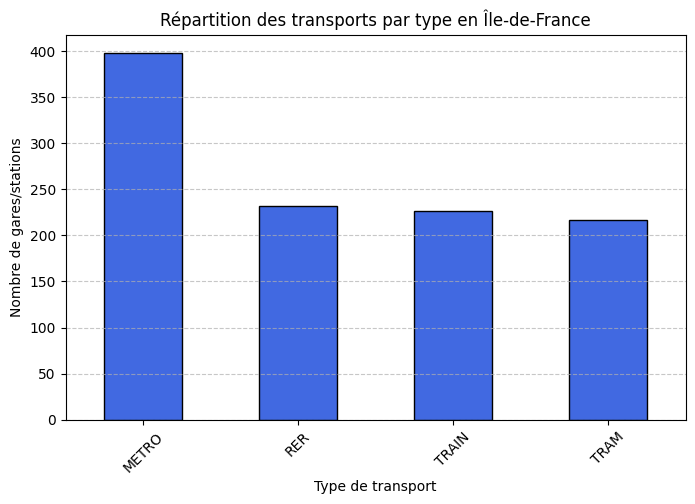

In [14]:
def count_by_type(df):

    type_counts = df['type'].value_counts().sort_values(ascending=False)

    print("\n--- R√©partition par type de transport ---")
    print(type_counts)

    plt.figure(figsize=(8,5))
    type_counts.plot(kind='bar', color='royalblue', edgecolor='black')
    plt.title("R√©partition des transports par type en √éle-de-France")
    plt.xlabel("Type de transport")
    plt.ylabel("Nombre de gares/stations")
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

count_by_type(transports_transformed)


### R√©partition des gares/stations par exploitant


--- R√©partition par exploitant ---
exploitant
RATP    653
SNCF    420
Name: count, dtype: int64


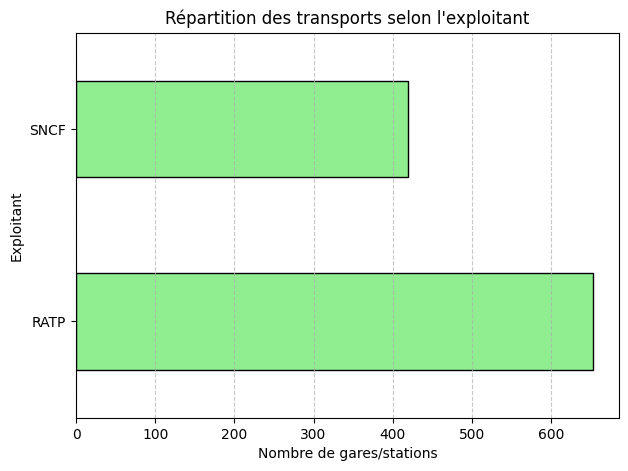

In [15]:
def count_by_exploitant(df):
    exp_counts = df['exploitant'].value_counts()

    print("\n--- R√©partition par exploitant ---")
    print(exp_counts)

    plt.figure(figsize=(7,5))
    exp_counts.plot(kind='barh', color='lightgreen', edgecolor='black')
    plt.title("R√©partition des transports selon l'exploitant")
    plt.xlabel("Nombre de gares/stations")
    plt.ylabel("Exploitant")
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()

count_by_exploitant(transports_transformed)


### Top 10 des stations multi-lignes 


--- Top 10 des gares/stations pr√©sentes sur plusieurs lignes ---
nom
Saint-Lazare                5
R√©publique                  5
Nation                      5
Gare de Lyon                5
Ch√¢telet                    5
La D√©fense                  4
Charles De Gaulle-√âtoile    4
Gare de l'Est               4
Gare du Nord                4
Porte de Clichy             4
Name: count, dtype: int64


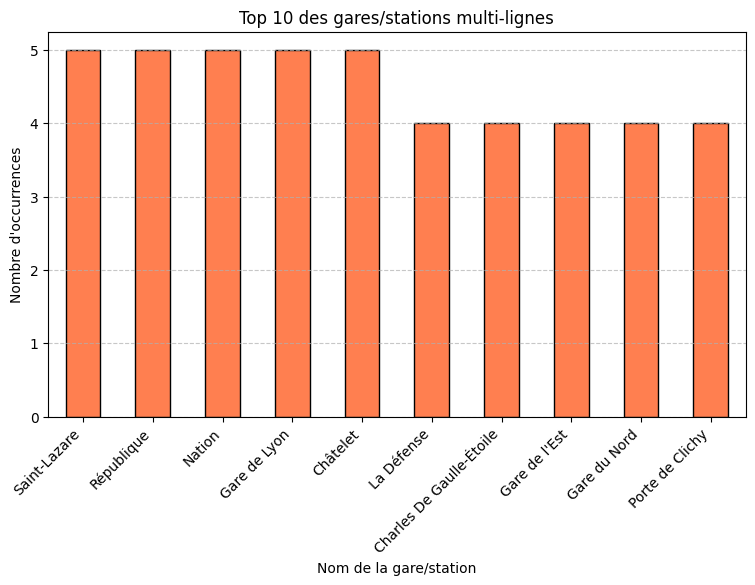

In [16]:
def top_duplicate_stations(df):
    
    duplicates = df['nom'].value_counts()
    top10 = duplicates.head(10)

    print("\n--- Top 10 des gares/stations pr√©sentes sur plusieurs lignes ---")
    print(top10)

    plt.figure(figsize=(9,5))
    top10.plot(kind='bar', color='coral', edgecolor='black')
    plt.title("Top 10 des gares/stations multi-lignes")
    plt.xlabel("Nom de la gare/station")
    plt.ylabel("Nombre d'occurrences")
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

top_duplicate_stations(transports_transformed)


---

## Visualisations exploratoires

### Carte des transports en √éle-de-France



Carte de la r√©partition des transports...


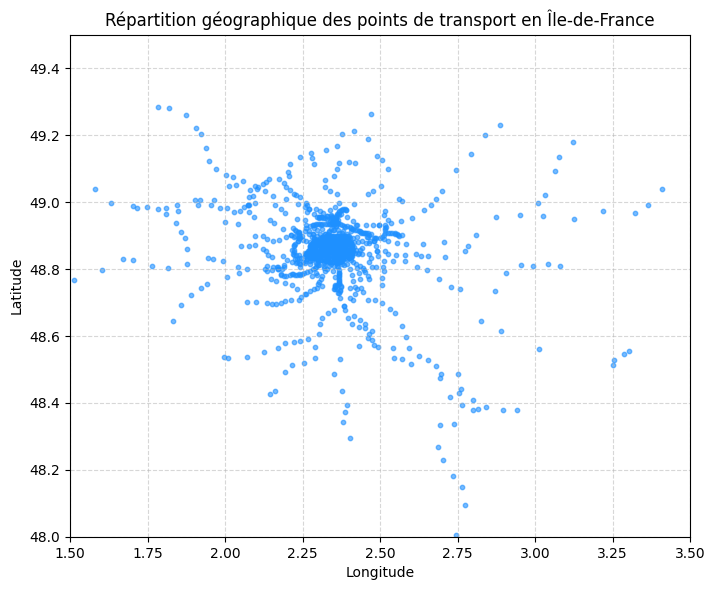

In [17]:
def spatial_distribution(gdf):
    print("\nCarte de la r√©partition des transports...")

    fig, ax = plt.subplots(figsize=(8, 8))
    gdf.plot(ax=ax, color='dodgerblue', markersize=10, alpha=0.6)

    plt.title("R√©partition g√©ographique des points de transport en √éle-de-France")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.grid(True, linestyle='--', alpha=0.5)

    # Zoom sur la r√©gion parisienne
    ax.set_xlim(1.5, 3.5)  
    ax.set_ylim(48.0, 49.5) 

    plt.show()

spatial_distribution(transports_gdf)

### Carte par type de transport (couleurs diff√©rentes)



 Carte color√©e par type de transport...


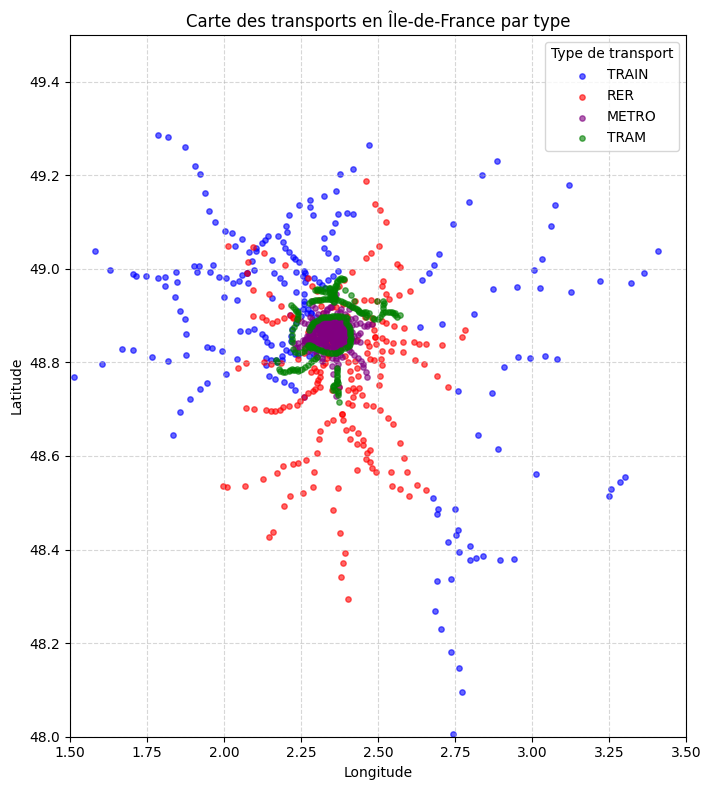

In [18]:
def plot_by_type(gdf):
    
    print("\n Carte color√©e par type de transport...")

    fig, ax = plt.subplots(figsize=(9, 8))
    plt.title("Carte des transports en √éle-de-France par type")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.grid(True, linestyle="--", alpha=0.5)

    # jeu de couleurs par type
    couleurs = {
        "METRO": "purple",
        "RER": "red",
        "TRAIN": "blue",
        "TRAM": "green",
    }

    # Tracer chaque type de transport
    for t in gdf["type"].unique():
        subset = gdf[gdf["type"] == t]
        subset.plot(ax=ax, color=couleurs.get(t, "gray"), label=t, markersize=15, alpha=0.6)

    # Zoom sur l'√éle-de-France
    ax.set_xlim(1.5, 3.5)
    ax.set_ylim(48.0, 49.5)

    plt.legend(title="Type de transport")
    plt.tight_layout()
    plt.show()

plot_by_type(transports_gdf)


---

## Export des donnees nettoyees

### Sauvegarde du dataset final

In [19]:
transports_gdf.to_file("data/transports_nettoyes.geojson", driver="GeoJSON")
print(f" Fichier export√© : transports_nettoyes.geojson ({len(transports_gdf)} lignes)")


 Fichier export√© : transports_nettoyes.geojson (1073 lignes)


---

## Synthese du nettoyage

### R√©sum√© des transformations effectu√©es

1. **Donn√©es brutes initiales :** 1 234 lignes, 47 colonnes  
2. **Apr√®s suppression des valeurs manquantes critiques :** 
   0 lignes supprim√©es  
3. **Apr√®s suppression des valeurs manquantes non critiques :** 
   103 valeurs manquantes non critiques remplac√©es par 0 
4. **Apr√®s suppression des doublons :** 60 doublons supprim√©s  
5. **Apr√®s suppression des lignes non pertinentes (VAL) :** 10 lignes retir√©es  
**1 164 lignes finales conserv√©es**  
6. **Colonnes finales (7) :**  
   `nom`, `type`, `ligne`, `exploitant`, `longitude`, `latitude`, `picto_url`  
7. **Nouvelles variables cr√©√©es :**  
   - `geometry` : point g√©ographique √† partir des coordonn√©es  
   - Harmonisation du champ `type` ‚Üí (TRAMWAY ‚Üí TRAM)  
7. **Format final :** GeoDataFrame (projection WGS84 ‚Äì EPSG:4326)



### Qualit√© des donn√©es finales

In [20]:
print("\n V√©rification finale de la qualit√© des donn√©es :")

# V√©rification des valeurs manquantes
missing_total = transports_gdf.isna().sum().sum()
print(f"- Valeurs manquantes totales : {missing_total}")

# Types de transport
types_transport = transports_gdf['type'].unique().tolist()
print(f"- Types de transport pr√©sents : {types_transport}")

# Nombre total de points
print(f"- Nombre total de points : {len(transports_gdf)}")

# V√©rification des types
print("\n Types de donn√©es :")
print(transports_gdf.dtypes[['nom', 'type', 'ligne', 'exploitant', 'longitude', 'latitude']])

# √âtendue g√©ographique
print("\n√âtendue g√©ographique (Lambert 93) :")
print(f"Latitude  : {transports_gdf['latitude'].min():.4f} ‚Üí {transports_gdf['latitude'].max():.4f}")
print(f"Longitude : {transports_gdf['longitude'].min():.4f} ‚Üí {transports_gdf['longitude'].max():.4f}")



 V√©rification finale de la qualit√© des donn√©es :
- Valeurs manquantes totales : 0
- Types de transport pr√©sents : ['TRAIN', 'RER', 'METRO', 'TRAM']
- Nombre total de points : 1073

 Types de donn√©es :
nom            object
type           object
ligne          object
exploitant     object
longitude     float64
latitude      float64
dtype: object

√âtendue g√©ographique (Lambert 93) :
Latitude  : 130833.5808 ‚Üí 6910209.5208
Longitude : 580155.7614 ‚Üí 729938.7108


### Recommandations pour l'analyse

Les variables les plus pertinentes pour la suite sont :  
`type`, `ligne`, `exploitant`, `geometry`

Le jeu de donn√©es est pr√™t pour :
-  Un **croisement spatial** avec les donn√©es DVF (biens immobiliers)
-  Un **calcul de distance minimale** entre un bien et le transport le plus proche
-  Une **cartographie interactive** sur Streamlit, Folium ou QGIS

**Attention :**
Pour **calculer la distance entre un bien immobilier et la station la plus proche** , il faut utiliser les colonnes longitude / latitude (Lambert 93).
Pour **afficher les stations sur une carte interactive (Folium / Streamlit)**, il faut utiliser geometry (WGS84 EPSG:4326)


---

**Notebook pr√©par√© par :**
- Ashley OHNONA
- Harisoa RANDRIANASOLO
- Fairouz YOUDARENE
- Jennifer ZAHORA

**Date :** 16/10/2025

**Dataset final :** `transports_nettoyes.geojson`